# 114. 二叉树展开为链表
中等
相关标签
相关企业
提示
给你二叉树的根结点 root ，请你将它展开为一个单链表：

展开后的单链表应该同样使用 TreeNode ，其中 right 子指针指向链表中下一个结点，而左子指针始终为 null 。
展开后的单链表应该与二叉树 先序遍历 顺序相同。
 

示例 1：

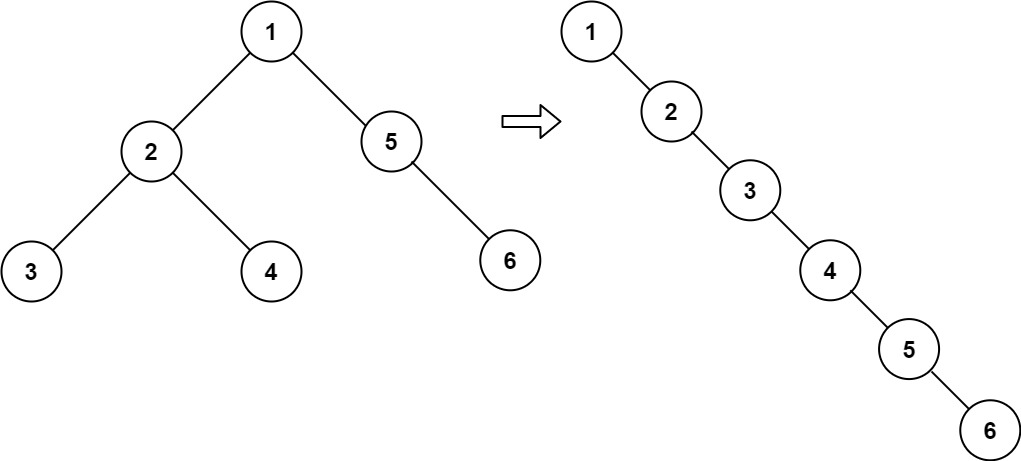

输入：root = [1,2,5,3,4,null,6]
输出：[1,null,2,null,3,null,4,null,5,null,6]
示例 2：

输入：root = []
输出：[]
示例 3：

输入：root = [0]
输出：[0]
 

提示：

树中结点数在范围 [0, 2000] 内
-100 <= Node.val <= 100
 

进阶：你可以使用原地算法（O(1) 额外空间）展开这棵树吗？

In [3]:
# Definition for a binary tree node.
class TreeNode(object):
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right
class Solution(object):
    def in_order_traversal(self,node):
        if node is None:
            return []
        return [node]+self.in_order_traversal(node.left) + self.in_order_traversal(node.right)
    
    def flatten(self, root):
        """
        :type root: TreeNode
        :rtype: None Do not return anything, modify root in-place instead.
        """
        preorderList = self.in_order_traversal(root)
        for i in range(1,len(preorderList)):
            pre,cur = preorderList[i-1],preorderList[i]
            pre.left = None
            pre.right =cur
        return 


# 测试样例
# 构造一个二叉搜索树:
#       3
#      / \
#     1   4
#      \
#       2
root = TreeNode(3)
root.left = TreeNode(1)
root.right = TreeNode(4)
root.left.right = TreeNode(2)
sol = Solution()
k = 3
print(sol.flatten(root))  # 输出：1

None


 解法二 变形的后序遍历 遍历顺序是右子树->左子树->根节点。


In [ ]:
# Definition for a binary tree node.
class TreeNode(object):
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right
class Solution(object):

    def flatten(self, root):
        """
        :type root: TreeNode
        :rtype: None Do not return anything, modify root in-place instead.
        """
        stack = []
        cur = root
        pre = None

        while cur is not None or stack:
            while cur is not None:
                stack.append(cur)  # 添加根节点
                cur = cur.right  # 递归添加右节点

            cur = stack[-1]  # 已经访问到最右的节点了

            # 在不存在左节点或者右节点已经访问过的情况下，访问根节点
            if cur.left is None or cur.left == pre:
                stack.pop()
                # 修改的地方
                cur.right = pre
                cur.left = None
                # 记录前一个访问的节点
                pre = cur
                cur = None
            else:
                cur = cur.left  # 左节点还没有访问过就先访问左节点

In [ ]:
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

def flatten(root):
    cur = root
    while cur:
        if cur.left:
            # 找到当前节点左子树的最右节点
            rightmost = cur.left
            while rightmost.right:
                rightmost = rightmost.right

            # 将当前节点的右子树接到左子树的最右节点上
            rightmost.right = cur.right

            # 将当前节点的左子树移到右边
            cur.right = cur.left
            cur.left = None

        # 移动到下一个节点
        cur = cur.right


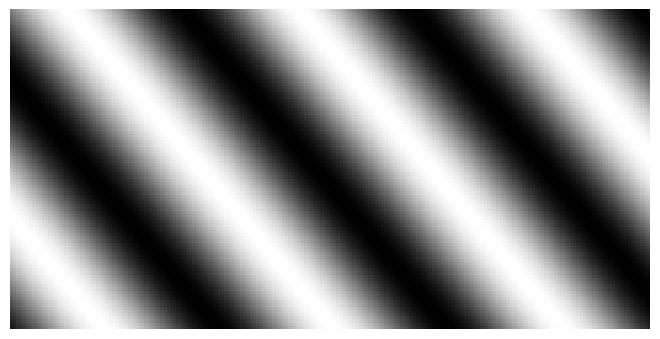

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# 定义图像尺寸
width, height = 200,100

# 创建网格的x和y坐标
x = np.linspace(0, 2 * np.pi, width)
y = np.linspace(0, 2 * np.pi, height)
x, y = np.meshgrid(x, y)

# 创建斜向的正弦波图案，通过组合x和y坐标得到倾斜效果
frequency = 3  # 频率决定条纹的密集程度
angle = -np.pi / 8  # 倾斜角度，45度
pattern = np.sin(frequency * (x * np.cos(angle) + y * np.sin(angle)))

# 创建图像并保存为无边框的图片
plt.imshow(pattern, cmap='gray', interpolation='none')
plt.axis('off')  # 关闭坐标轴
plt.gca().set_position([0, 0, 1, 1])  # 去除所有边距

# 保存图像为无边框的PNG文件
plt.savefig('F:\算法学习\output/slanted_sine_wave3.png', bbox_inches='tight', pad_inches=0, transparent=True)
plt.show()
